<a href="https://colab.research.google.com/github/ellenites/Week-0-EDA-of-solar-radiation-measurment/blob/main/EDA_for_togo_dapaong_qc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("/content/drive/MyDrive/data/togo-dapaong_qc.csv")

In [3]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [5]:
data.nunique()

Timestamp        525600
GHI                8633
DNI                9612
DHI                6841
ModA              10672
ModB               8439
Tamb                266
RH                  966
WS                  143
WSgust              156
WSstdev              44
WD                 3601
WDstdev             614
BP                   16
Cleaning              2
Precipitation        22
TModA               564
TModB               769
Comments              0
dtype: int64

In [6]:
(data.isnull().sum()/(len(data)))*100

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [7]:
#since the comment and clean colomn doesn't express much value to the analysis we can reduce them
data = data.drop(['Comments'], axis = 1)
data = data.drop(['Cleaning'], axis = 1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64
dtypes: float64(15), int64(1), obj

In [8]:
# Replace negative values in GHI column with NaN
data['GHI'] = data['GHI'].apply(lambda x: x if x >= 0 else float('NaN'))
data['DNI'] = data['DNI'].apply(lambda x: x if x >= 0 else float('NaN'))
data['DHI'] = data['DHI'].apply(lambda x: x if x >= 0 else float('NaN'))

# Check if negative values in GHI are replaced with NaN
print("Negative Values in GHI replaced with NaN:")
print(data[data['GHI'] < 0])



Negative Values in GHI replaced with NaN:
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Precipitation, TModA, TModB]
Index: []


In [9]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Precipitation,TModA,TModB
0,2021-10-25 00:01,NaN,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0.0,24.7,24.4
1,2021-10-25 00:02,NaN,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0.0,24.7,24.4
2,2021-10-25 00:03,NaN,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0.0,24.7,24.4
3,2021-10-25 00:04,NaN,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0.0,24.7,24.4
4,2021-10-25 00:05,NaN,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0.0,24.7,24.4


In [10]:
# Check for missing values after replacing negative values with NaN
missing_values_after_replacement = data.isnull().sum()
print("\nMissing Values after replacing negative values with NaN:")
print(missing_values_after_replacement)



Missing Values after replacing negative values with NaN:
Timestamp             0
GHI              257385
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64


In [ ]:
# Convert DataFrame values to numeric types
#data = data.apply(pd.to_numeric, errors='coerce')

    # Count negative numbers and replace them with 'a'
#negative_count = (data._get_numeric_data() < 0).sum().sum()


#data[data < 0] = 'a'


In [11]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Precipitation,TModA,TModB
0,2021-10-25 00:01,NaN,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0.0,24.7,24.4
1,2021-10-25 00:02,NaN,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0.0,24.7,24.4
2,2021-10-25 00:03,NaN,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0.0,24.7,24.4
3,2021-10-25 00:04,NaN,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0.0,24.7,24.4
4,2021-10-25 00:05,NaN,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0.0,24.7,24.4


In [12]:
from pydoc import replace

# Handling missing values: you can choose different strategies based on your data and requirements, such as imputation or removal
# For demonstration purposes, let's drop rows with missing values
data.dropna(inplace=True)

# Reset index after removing rows
data.reset_index(drop=True, inplace=True)

# Verify if missing values
print("\nAfter Data Cleaning:")
print(data.info())



After Data Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268215 entries, 0 to 268214
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      268215 non-null  object 
 1   GHI            268215 non-null  float64
 2   DNI            268215 non-null  float64
 3   DHI            268215 non-null  float64
 4   ModA           268215 non-null  float64
 5   ModB           268215 non-null  float64
 6   Tamb           268215 non-null  float64
 7   RH             268215 non-null  float64
 8   WS             268215 non-null  float64
 9   WSgust         268215 non-null  float64
 10  WSstdev        268215 non-null  float64
 11  WD             268215 non-null  float64
 12  WDstdev        268215 non-null  float64
 13  BP             268215 non-null  int64  
 14  Precipitation  268215 non-null  float64
 15  TModA          268215 non-null  float64
 16  TModB          268215 non-null  float64
dtypes: floa

In [13]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Precipitation,TModA,TModB
0,2021-10-25 05:43,0.0,0.0,0.6,1.2,1.2,25.2,92.7,1.8,2.1,0.3,225.4,4.8,977,0.0,25.0,24.8
1,2021-10-25 05:44,0.2,0.0,0.7,1.4,1.4,25.2,92.7,1.4,1.9,0.4,231.2,5.8,977,0.0,25.0,24.7
2,2021-10-25 05:45,0.5,0.0,0.8,1.6,1.6,25.2,92.8,1.5,1.9,0.4,229.9,7.9,977,0.0,25.0,24.7
3,2021-10-25 05:46,0.8,0.0,0.9,1.9,1.9,25.2,92.6,1.6,2.1,0.4,230.1,7.0,977,0.0,25.0,24.7
4,2021-10-25 05:47,1.0,0.0,1.0,2.1,2.1,25.1,92.5,1.6,1.9,0.4,230.0,7.0,977,0.0,25.0,24.7


Timestamp column does not exist in the dataset.
Cannot perform time series analysis. Timestamp column does not exist in the dataset.


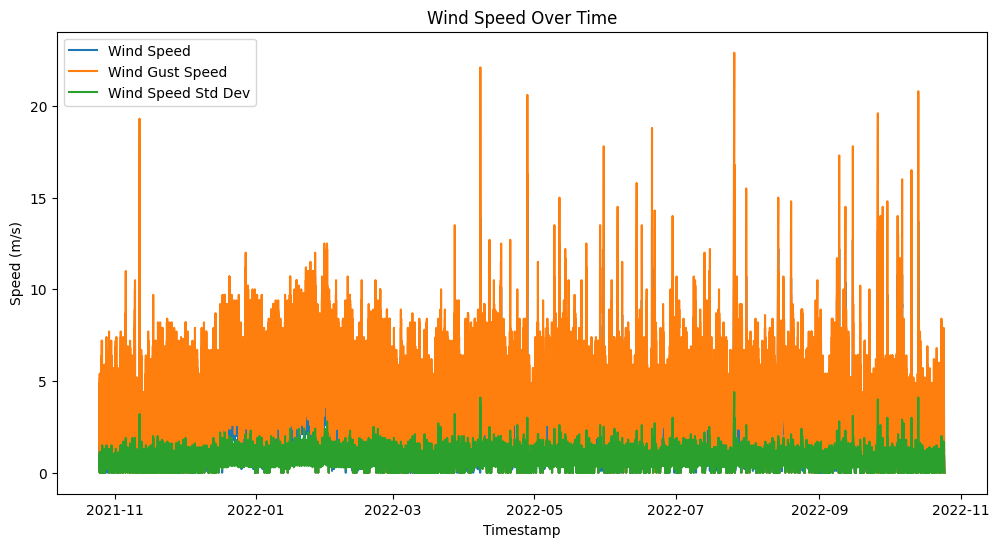

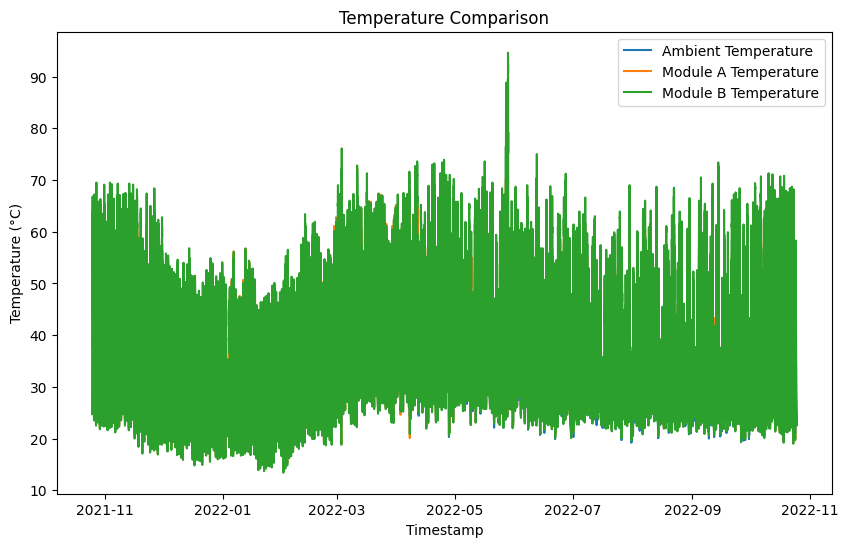

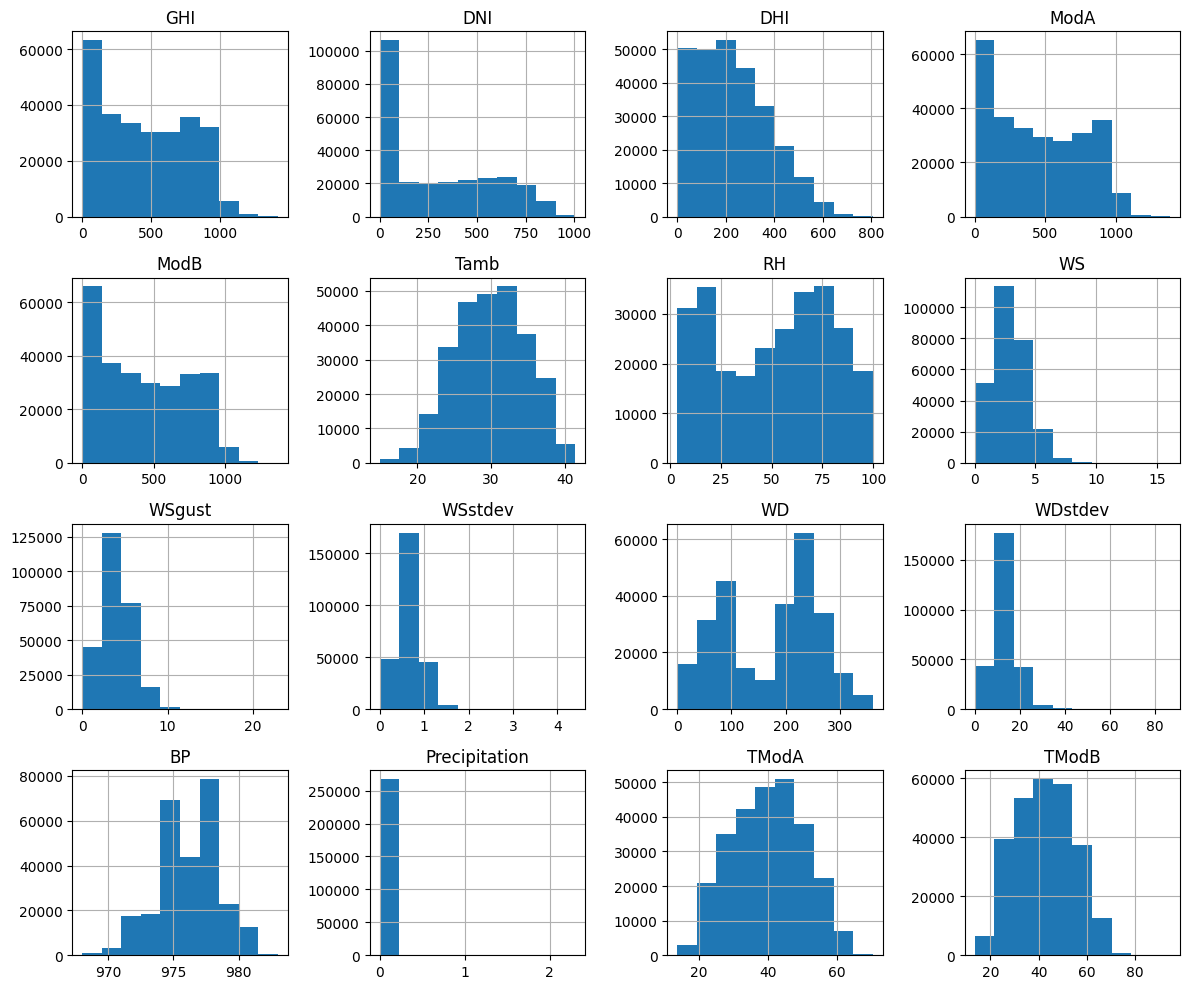

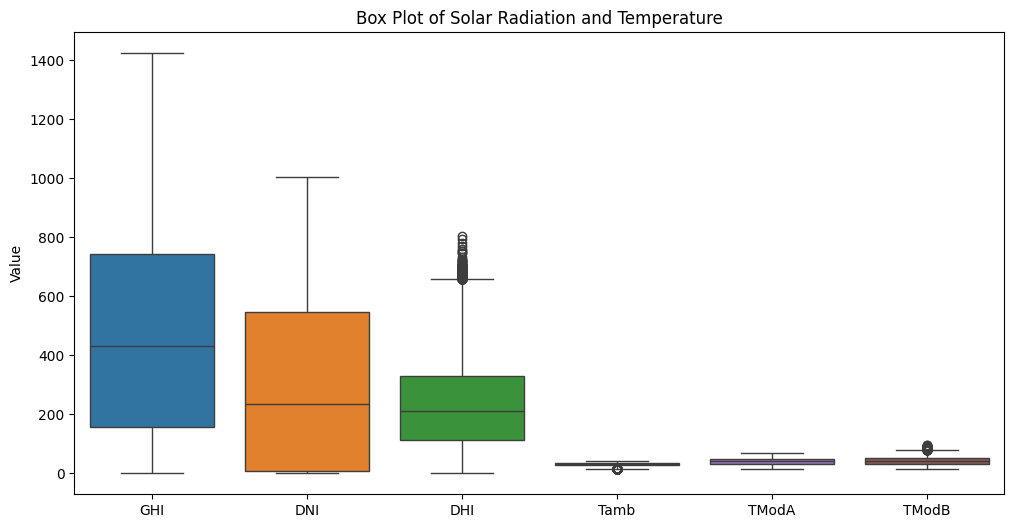

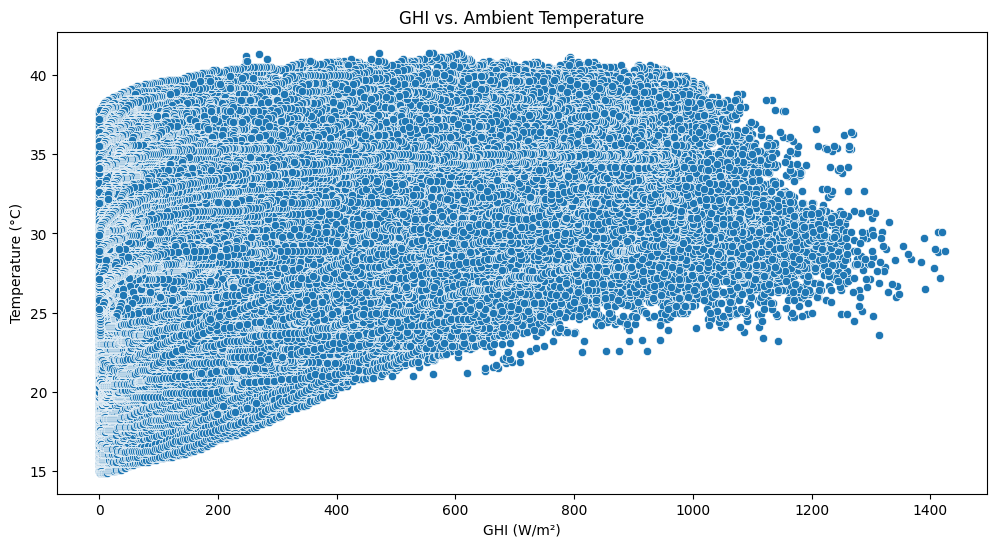

Comments column does not exist in the dataset.


In [15]:

# Check if 'Timestamp' column exists
if 'Timestamp' in data.columns:
    # Convert 'Timestamp' column to datetime
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data.set_index('Timestamp', inplace=True)
else:
    print("Timestamp column does not exist in the dataset.")

# Summary Statistics
summary_stats = data.describe()

# Data Quality Check
missing_values = data.isnull().sum()
outliers = data[(np.abs(data - data.mean()) > 3 * data.std())].count()

# Time Series Analysis
if 'Timestamp' in data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(data['GHI'], label='GHI')
    plt.plot(data['DNI'], label='DNI')
    plt.plot(data['DHI'], label='DHI')
    plt.plot(data['Tamb'], label='Tamb')
    plt.legend()
    plt.title('Solar Radiation and Temperature Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.show()
else:
    print("Cannot perform time series analysis. Timestamp column does not exist in the dataset.")

# Correlation Analysis
correlation_matrix = data.corr()

# Wind Analysis
# Plot wind speed over time
if 'WS' in data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(data['WS'], label='Wind Speed')
    plt.plot(data['WSgust'], label='Wind Gust Speed')
    plt.plot(data['WSstdev'], label='Wind Speed Std Dev')
    plt.legend()
    plt.title('Wind Speed Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Speed (m/s)')
    plt.show()
else:
    print("Cannot perform wind analysis. Wind speed columns do not exist in the dataset.")

# Temperature Analysis
# Compare module temperatures with ambient temperature
if 'Tamb' in data.columns and 'TModA' in data.columns and 'TModB' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data['Tamb'], label='Ambient Temperature')
    plt.plot(data['TModA'], label='Module A Temperature')
    plt.plot(data['TModB'], label='Module B Temperature')
    plt.legend()
    plt.title('Temperature Comparison')
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature (°C)')
    plt.show()
else:
    print("Cannot perform temperature analysis. Temperature columns do not exist in the dataset.")

# Histograms
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB']])
plt.title('Box Plot of Solar Radiation and Temperature')
plt.ylabel('Value')
plt.show()

# Scatter Plots
plt.figure(figsize=(12, 6))
sns.scatterplot(x='GHI', y='Tamb', data=data)
plt.title('GHI vs. Ambient Temperature')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Temperature (°C)')
plt.show()

# Data Cleaning (if necessary)
# Handle missing values or outliers based on analysis

# Check for comments column
if 'Comments' in data.columns:
    comments_null_count = data['Comments'].isnull().sum()
else:
    print("Comments column does not exist in the dataset.")
